## 读取数据

In [1]:
# 导包
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 计算目的地经纬度距离
from haversine import haversine
import numpy as np
# 时间差 转换成秒
from datetime import timedelta
# 导入地理可视化库
import folium
from folium.plugins import MarkerCluster,HeatMap
from folium import Marker
import os

from pyecharts import options as opts
from pyecharts.charts import Bar, Timeline

# 绘制饼图
from pyecharts.charts import Pie, Timeline,Grid
#from pyecharts.faker import Faker

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# 这部分代码是从文件中读取数据，以便我们可以纠正它
data = pd.read_csv('F:\study\Python project\PythonDataAnalysis\Practical training\\Uber\\traffic_location.csv')
print("Number of rows in the table is: ",len(data))
data.head()

Number of rows in the table is:  1968685


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,0/0/0 00:00:00,0/0/0 00:00:00,0,0.00,0.000000,0.000000,0,store,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1/1/2016 00:00:00,1/1/2016 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
2,2,1/1/2016 00:00:00,1/1/2016 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
3,2,1/1/2016 00:00:00,1/1/2016 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
4,2,1/1/2016 00:00:00,1/1/2016 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3


In [3]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

## 经纬度clean
## 纬度范围北纬25到北纬49之间
## 经度范围在西经70到130之间

### 接单经纬度范围处理

### 接单经度

In [4]:
data['pickup_longitude'].describe()

count    1.968685e+06
mean    -7.271181e+01
std      9.569177e+00
min     -1.219343e+02
25%     -7.399104e+01
50%     -7.398064e+01
75%     -7.396399e+01
max      0.000000e+00
Name: pickup_longitude, dtype: float64

In [5]:
outlier = data[(data['pickup_longitude'] <-130) | (data['pickup_longitude']>-60)]
print("outlier is:",len(outlier))
data1 = data[(data['pickup_longitude'] >-130) & (data['pickup_longitude']<-60)]
print("new data is",len(data1))

outlier is: 33516
new data is 1935169


### 接单纬度

In [6]:
data1['pickup_latitude'].describe()

count    1.935169e+06
mean     4.075072e+01
std      3.953139e-02
min      2.930932e+01
25%      4.073751e+01
50%      4.075495e+01
75%      4.076904e+01
max      5.726928e+01
Name: pickup_latitude, dtype: float64

In [7]:
outlier = data1[(data1['pickup_latitude'] > 49) | (data1['pickup_latitude'] < 25)]
print("outlier is:",len(outlier))
data2 = data1[(data1['pickup_latitude'] < 49) & (data1['pickup_latitude'] > 25)]
print("new data is ",len(data2))

outlier is: 1
new data is  1935168


### 目的地经度

In [8]:
data2['dropoff_longitude'].describe()

count    1.935168e+06
mean    -7.386437e+01
std      2.829454e+00
min     -1.219335e+02
25%     -7.399072e+01
50%     -7.397915e+01
75%     -7.396164e+01
max      0.000000e+00
Name: dropoff_longitude, dtype: float64

In [9]:
outlier = data2[(data2['dropoff_longitude'] <-130) | (data2['dropoff_longitude']>-60)]
print("outlier is ",len(outlier))
data3 = data2[(data2['dropoff_longitude'] >-130) & (data2['dropoff_longitude']<-60)]
print("new data is ",len(data3))

outlier is  2833
new data is  1932335


### 目的地纬度

In [10]:
data3['dropoff_latitude'].describe()

count    1.932335e+06
mean     4.075191e+01
std      5.767921e-02
min      6.666670e-01
25%      4.073604e+01
50%      4.075499e+01
75%      4.077052e+01
max      4.823333e+01
Name: dropoff_latitude, dtype: float64

In [11]:
outlier = data3[(data3['dropoff_latitude'] > 49) | (data3['dropoff_latitude'] <25)]
print("outlier is ",len(outlier))
data4 = data3[(data3['dropoff_latitude'] < 49) & (data3['dropoff_latitude'] >25)]
print("new data is ",len(data4))

outlier is  2
new data is  1932333


### 接单经纬度整体处理

In [12]:
data4.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.932333e+06,1.932333e+06,1.932333e+06,1.932333e+06,1.932333e+06,1.932333e+06,1.932333e+06,1.932333e+06,1.932333e+06,1.932333e+06,1.932333e+06,1.932333e+06,1.932333e+06,1.932333e+06,1.932333e+06,1.932333e+06
mean,1.542892e+00,1.708353e+00,8.399888e+00,-7.397106e+01,4.075072e+01,1.040626e+00,-7.397260e+01,4.075195e+01,1.402424e+00,1.239599e+01,2.958560e-01,4.977063e-01,1.591805e+00,3.058418e-01,2.997651e-01,1.538696e+01
std,4.981570e-01,1.337447e+00,5.864120e+03,1.067420e-01,3.769688e-02,4.119661e-01,1.102399e-01,4.119049e-02,5.057509e-01,1.123502e+01,3.555769e-01,3.620737e-02,2.729033e+00,1.819738e+00,1.153712e-02,1.369422e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.219343e+02,2.930932e+01,1.000000e+00,-1.219335e+02,2.930932e+01,1.000000e+00,-3.000000e+02,-1.000000e+00,-5.000000e-01,-6.200000e+01,-1.740000e+01,-3.000000e-01,-3.008000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399119e+01,4.073751e+01,1.000000e+00,-7.399074e+01,4.073604e+01,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.160000e+00
50%,2.000000e+00,1.000000e+00,1.700000e+00,-7.398102e+01,4.075496e+01,1.000000e+00,-7.397918e+01,4.075499e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.115000e+01
75%,2.000000e+00,2.000000e+00,3.230000e+00,-7.396551e+01,4.076904e+01,1.000000e+00,-7.396174e+01,4.077052e+01,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.080000e+00,0.000000e+00,3.000000e-01,1.656000e+01
max,2.000000e+00,9.000000e+00,8.000010e+06,-6.932915e+01,4.636949e+01,9.900000e+01,-6.815104e+01,4.823333e+01,4.000000e+00,9.989000e+02,3.180000e+01,8.900000e-01,9.981400e+02,9.235800e+02,3.000000e-01,1.298950e+03


## 批量处理函数

In [13]:
# def clean_data_outlier(data,value_name):
#     # 异常值
#     q1 = data[value_name].quantile(0.25)
#     q2 = data[value_name].quantile(0.75)
#     iqr = q2 - q1
#     upper_limit = q2 + (1.5 * iqr)
#     lower_limit = q1 - (1.5 * iqr)
#     # find the outlier
#     outlier = data.loc[(data[value_name] > upper_limit) | (data[value_name] < lower_limit)]
#     # trimming -delete the outlier data
#     new_data = data.loc[(data[value_name] < upper_limit) & (data[value_name] > lower_limit)]
#     print("new data is", len(new_data))
#     print("old data is", len(data))
#     print("outlier:", len(outlier))
#     return new_data

### 箱型图处理数据

In [14]:
# print("接单地经度处理：\n")
# data5 = clean_data_outlier(data4,'pickup_longitude')
# print("接单地纬度处理：\n")
# data6 = clean_data_outlier(data5,'pickup_latitude')
# print("目的地经度:\n")
# data7 = clean_data_outlier(data6,'dropoff_longitude')
# print("目的地纬度:\n")
# data8 = clean_data_outlier(data7,'dropoff_latitude')

## 接单经度处理2

In [15]:
# 接单经度处理2
q1 = data4['pickup_longitude'].quantile(0.25)
q2 = data4['pickup_longitude'].quantile(0.75)
iqr = q2 - q1
upper_limit = q2 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
print("upper limit is:",upper_limit)
print("lower limit is:",lower_limit)

upper limit is: -73.92698669433594
lower limit is: -74.02970886230469


<AxesSubplot:>

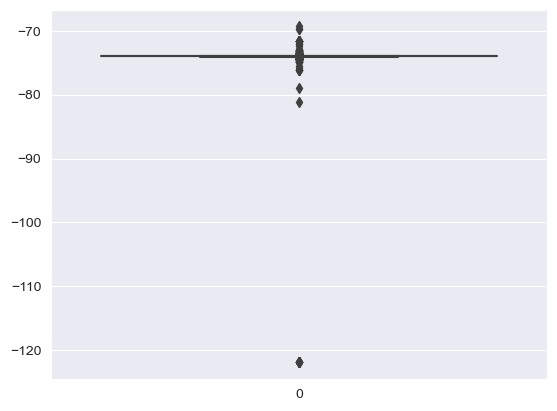

In [16]:
# 初始箱型图
sns.boxplot(data4['pickup_longitude'].tolist())

In [17]:
# 删除异常值
outlier = data4.loc[(data4['pickup_longitude'] > upper_limit) | (data4['pickup_longitude'] < lower_limit)]
# trimming -delete the outlier data
data5 = data4.loc[(data4['pickup_longitude'] < upper_limit) & (data4['pickup_longitude'] > lower_limit)]
print("new data is", len(data5))
print("old data is", len(data4))
print("outlier:", len(outlier))

new data is 1798510
old data is 1932333
outlier: 133816


<AxesSubplot:>

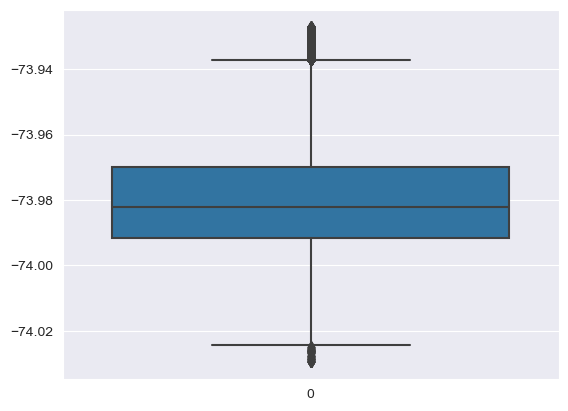

In [18]:
# 删除异常值之后的箱型图
sns.boxplot(data5['pickup_longitude'].tolist())

In [19]:
# 接单纬度处理2
q3 = data5['pickup_latitude'].quantile(0.25)
q4 = data5['pickup_latitude'].quantile(0.75)
iqr = q4 - q3
upper_limit = q4 + (1.5 * iqr)
lower_limit = q3 - (1.5 * iqr)
print("upper limit is:",upper_limit)
print("lower limit is:",lower_limit)

upper limit is: 40.81201934814453
lower limit is: 40.695045471191406


<AxesSubplot:>

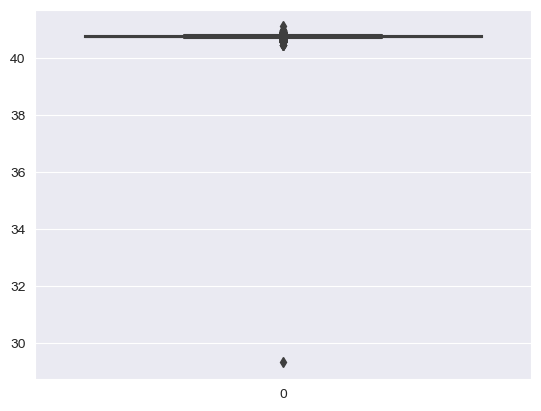

In [20]:
# 初始箱型图
sns.boxplot(data5['pickup_latitude'].tolist())

In [21]:
# 删除异常值
outlier = data5.loc[(data5['pickup_latitude'] > upper_limit) | (data5['pickup_latitude'] < lower_limit)]
# trimming -delete the outlier data
data6 = data5.loc[(data5['pickup_latitude'] < upper_limit) & (data5['pickup_latitude'] > lower_limit)]
print("new data is", len(data6))
print("old data is", len(data5))
print("outlier:", len(outlier))

new data is 1766482
old data is 1798510
outlier: 32013


<AxesSubplot:>

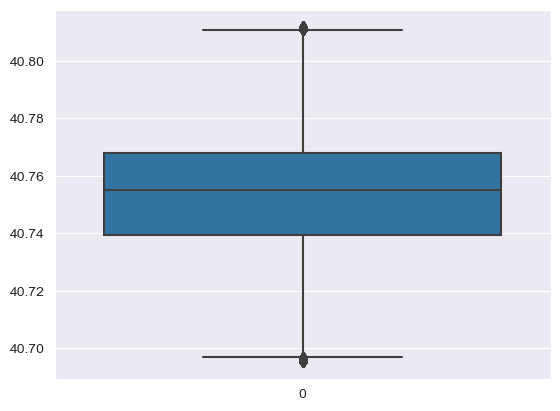

In [22]:
# 删除异常值之后的箱型图
sns.boxplot(data6['pickup_latitude'].tolist())

## 目的地经度处理2

In [23]:
q5 = data6['dropoff_longitude'].quantile(0.25)
q6 = data6['dropoff_longitude'].quantile(0.75)
iqr = q6 - q5
upper_limit = q6 + (1.5 * iqr)
lower_limit = q5 - (1.5 * iqr)
print("upper limit is:",upper_limit)
print("lower limit is:",lower_limit)

upper limit is: -73.92342376708984
lower limit is: -74.0316390991211


初始化箱型图

<AxesSubplot:>

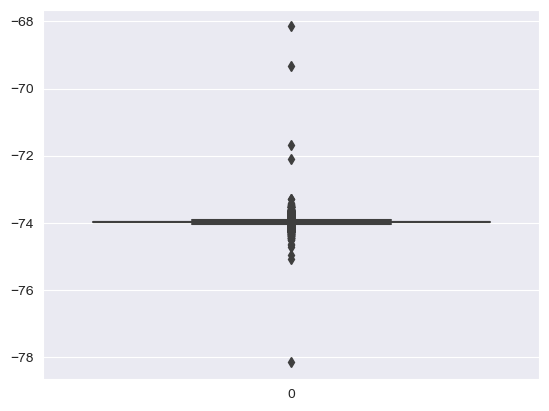

In [24]:
sns.boxplot(data6['dropoff_longitude'].tolist())

删除异常值

In [25]:
outlier = data6.loc[(data6['dropoff_longitude'] > upper_limit) | (data6['dropoff_longitude'] < lower_limit)]
# trimming -delete the outlier data
data7 = data6.loc[(data6['dropoff_longitude'] < upper_limit) & (data6['dropoff_longitude'] > lower_limit)]
print("new data is", len(data7))
print("old data is", len(data6))
print("outlier:", len(outlier))

new data is 1691195
old data is 1766482
outlier: 75277


删除异常值之后的箱型图

<AxesSubplot:>

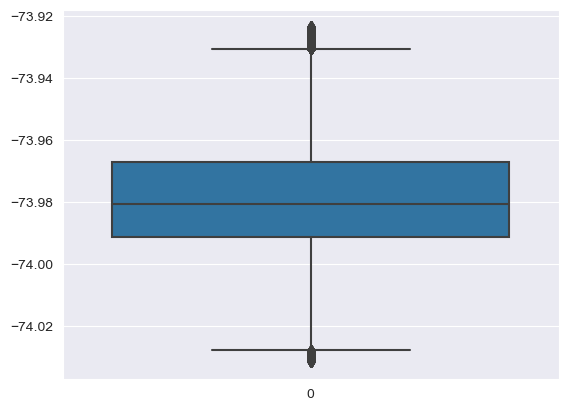

In [26]:
sns.boxplot(data7['dropoff_longitude'].tolist())

### 目的地纬度处理2

In [27]:
q7 = data6['dropoff_latitude'].quantile(0.25)
q8 = data6['dropoff_latitude'].quantile(0.75)
iqr = q8 - q7
upper_limit = q8 + (1.5 * iqr)
lower_limit = q7 - (1.5 * iqr)
print("upper limit is:",upper_limit)
print("lower limit is:",lower_limit)

upper limit is: 40.81993103027342
lower limit is: 40.68846130371095


初始化箱型图

<AxesSubplot:>

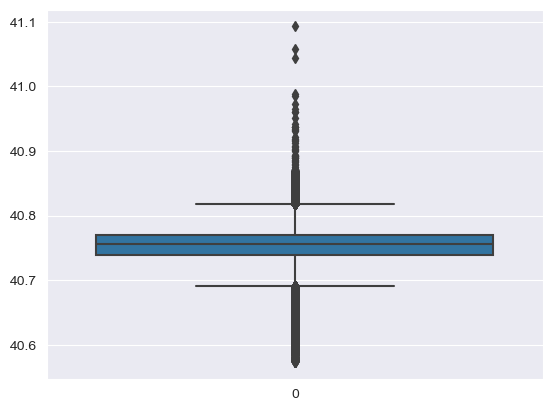

In [28]:
sns.boxplot(data7['dropoff_latitude'].tolist())

删除异常值

In [29]:
outlier = data7.loc[(data7['dropoff_latitude'] > upper_limit) | (data7['dropoff_latitude'] < lower_limit)]
# trimming -delete the outlier data
data8 = data7.loc[(data7['dropoff_latitude'] < upper_limit) & (data7['dropoff_latitude'] > lower_limit)]
print("new data is", len(data8))
print("old data is", len(data7))
print("outlier:", len(outlier))

new data is 1645444
old data is 1691195
outlier: 45751


删除异常值之后的箱型图

<AxesSubplot:>

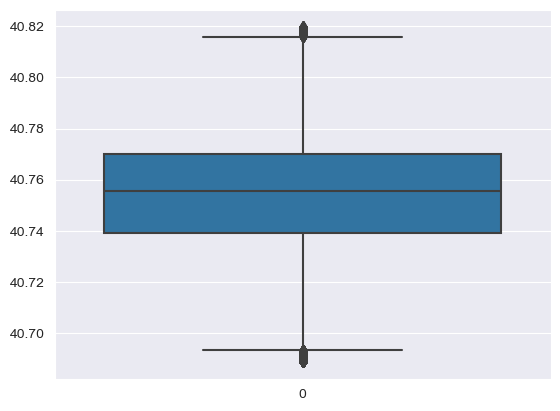

In [30]:
sns.boxplot(data8['dropoff_latitude'].tolist())

In [31]:
data_clean_lon_lat = data8

### 乘客数据清理

upper limit is: 6.0
lower limit is: 1.0
new data is 1645379
old data is 1645444
outlier: 65


<AxesSubplot:>

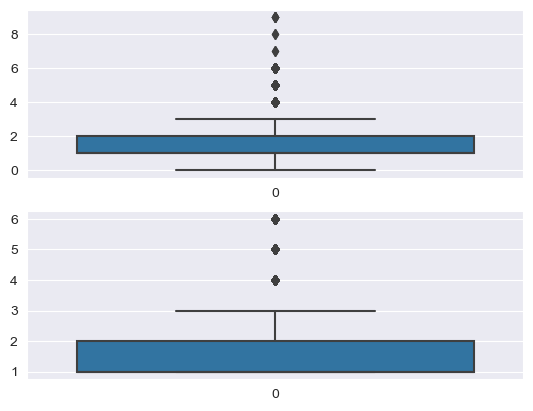

In [32]:
pic = plt.figure()

# q1 = data_clean_lon_lat['passenger_count'].quantile(0.25)
# q2 = data_clean_lon_lat['passenger_count'].quantile(0.75)
# iqr = q2 - q1
# upper_limit = q2 + (1.5 * iqr)
# lower_limit = q1 - (1.5 * iqr)

upper_limit = data_clean_lon_lat['passenger_count'].quantile(0.99)
lower_limit = data_clean_lon_lat['passenger_count'].quantile(0.01)
print("upper limit is:",upper_limit)
print("lower limit is:",lower_limit)
# 初始化箱型图
pic.add_subplot(2,1,1)
sns.boxplot(data_clean_lon_lat['passenger_count'].tolist())
# 删除异常值
outlier = data_clean_lon_lat.loc[(data_clean_lon_lat['passenger_count'] > upper_limit) | (data_clean_lon_lat['passenger_count'] < lower_limit)]
# trimming -delete the outlier data
data_passenger = data_clean_lon_lat.loc[(data_clean_lon_lat['passenger_count'] <= upper_limit) & (data_clean_lon_lat['passenger_count'] >= lower_limit)]
print("new data is", len(data_passenger))
print("old data is", len(data_clean_lon_lat))
print("outlier:", len(outlier))
# 删除异常值之后的箱型图
pic.add_subplot(2,1,2)
sns.boxplot(data_passenger['passenger_count'].tolist())

In [33]:
data_passenger.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.645379e+06,1.645379e+06,1.645379e+06,1.645379e+06,1.645379e+06,1.645379e+06,1.645379e+06,1.645379e+06,1.645379e+06,1.645379e+06,1.645379e+06,1.645379e+06,1.645379e+06,1.645379e+06,1.645379e+06,1.645379e+06
mean,1.540753e+00,1.702202e+00,3.337376e+00,-7.398092e+01,4.075394e+01,1.006077e+00,-7.397948e+01,4.075430e+01,1.402457e+00,9.315919e+00,2.988550e-01,4.991543e-01,1.201874e+00,1.463525e-02,2.997821e-01,1.163022e+01
std,4.983366e-01,1.335015e+00,1.219948e+03,1.632623e-02,2.119618e-02,2.866865e-01,1.759379e-02,2.331753e-02,5.035243e-01,5.361455e+00,3.617027e-01,2.419967e-02,1.759150e+00,3.323841e-01,1.120205e-02,6.216061e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,-7.402958e+01,4.069505e+01,1.000000e+00,-7.403161e+01,4.068847e+01,1.000000e+00,-3.000000e+02,-1.000000e+00,-5.000000e-01,-6.200000e+01,-1.740000e+01,-3.000000e-01,-3.008000e+02
25%,1.000000e+00,1.000000e+00,9.200000e-01,-7.399180e+01,4.073976e+01,1.000000e+00,-7.399141e+01,4.073930e+01,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,7.800000e+00
50%,2.000000e+00,1.000000e+00,1.500000e+00,-7.398220e+01,4.075528e+01,1.000000e+00,-7.398101e+01,4.075565e+01,1.000000e+00,8.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.030000e+01
75%,2.000000e+00,2.000000e+00,2.460000e+00,-7.397036e+01,4.076822e+01,1.000000e+00,-7.396798e+01,4.076997e+01,2.000000e+00,1.150000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.400000e+01
max,2.000000e+00,6.000000e+00,1.403240e+06,-7.392699e+01,4.081202e+01,9.900000e+01,-7.392343e+01,4.081993e+01,4.000000e+00,9.980000e+02,3.180000e+01,5.000000e-01,9.981400e+02,8.554000e+01,3.000000e-01,1.004940e+03


### 里程数据清理

upper limit is: 7.1
lower limit is: 0.25
new data is 1612941
old data is 1645379
outlier: 32438


<AxesSubplot:>

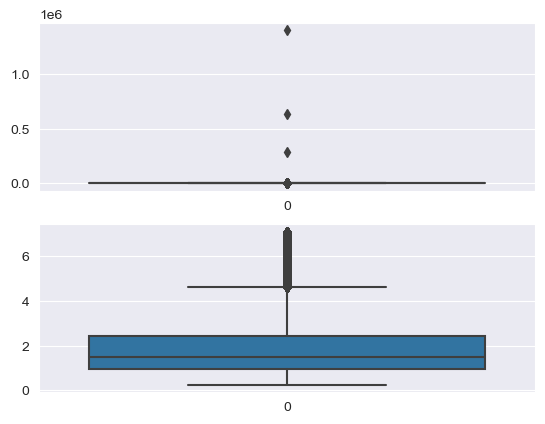

In [34]:
# data_trip_distance = clean_data_outlier(data_passenger,'trip_distance')
pic = plt.figure()

upper_limit = data_passenger['trip_distance'].quantile(0.99)
lower_limit = data_passenger['trip_distance'].quantile(0.01)
print("upper limit is:",upper_limit)
print("lower limit is:",lower_limit)
# 初始化箱型图
pic.add_subplot(2,1,1)
sns.boxplot(data_passenger['trip_distance'].tolist())
# 删除异常值
outlier = data_passenger.loc[(data_passenger['trip_distance'] > upper_limit) | (data_passenger['trip_distance'] < lower_limit)]
# trimming -delete the outlier data
data_trip_distance = data_passenger.loc[(data_passenger['trip_distance'] <= upper_limit) & (data_passenger['trip_distance'] >= lower_limit)].copy()
print("new data is", len(data_trip_distance))
print("old data is", len(data_passenger))
print("outlier:", len(outlier))
# 删除异常值之后的箱型图
pic.add_subplot(2,1,2)
sns.boxplot(data_trip_distance['trip_distance'].tolist())

### 根据经纬度计算距离

In [35]:
data_trip_distance.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
1,2,1/1/2016 00:00:00,1/1/2016 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
2,2,1/1/2016 00:00:00,1/1/2016 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
5,2,1/1/2016 00:00:00,1/1/2016 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8
8,1,1/1/2016 00:00:01,1/1/2016 00:11:55,1,1.20,-73.979424,40.744614,1,N,-73.992035,40.753944,2,9.0,0.5,0.5,0.0,0.0,0.3,10.3
11,2,1/1/2016 00:00:03,1/1/2016 00:06:19,1,0.79,-74.006149,40.744919,1,N,-73.993797,40.741440,2,6.0,0.5,0.5,0.0,0.0,0.3,7.3


In [36]:
# lon = data_trip_distance['pickup_longitude'].to_numpy()
# lat = data_trip_distance['pickup_latitude'].to_numpy()
# lon_dropoff = data_trip_distance['dropoff_longitude'].to_numpy()
# lat_dropoff = data_trip_distance['dropoff_latitude'].to_numpy()
#
# distance = haversine(lon[:, None], lat[:, None], lon_dropoff[:, None], lat_dropoff[:, None])
# len(distance)

In [37]:
lon = np.array(list(data_trip_distance['pickup_longitude']))
lat = np.array(list(data_trip_distance['pickup_latitude']))

pickup_lon_lat = list(zip(lon,lat))

lon_dropoff = np.array(list(data_trip_distance['dropoff_longitude']))
lat_dropoff = np.array((list(data_trip_distance['dropoff_latitude'])))

dropoff_lon_lat = list(zip(lon_dropoff,lat_dropoff))

print("初始经纬度坐标:\n",pickup_lon_lat[0])
print("目的地经纬度坐标:\n",dropoff_lon_lat[0])

初始经纬度坐标:
 (-73.99037170410156, 40.73469543457031)
目的地经纬度坐标:
 (-73.98184204101562, 40.73240661621094)


In [38]:
print(pickup_lon_lat[0])
print(dropoff_lon_lat[0])
distance = []
for i in range(len(pickup_lon_lat)):
    distance.append(haversine(pickup_lon_lat[i],dropoff_lon_lat[i]))
len(distance)

(-73.99037170410156, 40.73469543457031)
(-73.98184204101562, 40.73240661621094)


1612941

**把直线距离加入表中**

In [39]:
a = [1,2,3,4]

b = a.copy()
b

[1, 2, 3, 4]

In [40]:
data_trip_distance['distance'] = distance

In [41]:
len(data_trip_distance)

1612941

## 经纬度数据处理
### 路程大于位移

In [42]:
data_trip_distance = data_trip_distance[(data_trip_distance['distance'] <= data_trip_distance['trip_distance'])]

In [43]:
len(data_trip_distance)

807417

### 总费用的处理
### 总费用=fare_amount+extra+mta_tax+tip_amount+tolls_amount+improvement_surcharge

In [44]:
data_total_amount_outlier = data_trip_distance.loc[data_trip_distance['total_amount'] != data_trip_distance['fare_amount']+data_trip_distance['extra']+data_trip_distance['mta_tax']+data_trip_distance['tip_amount']+data_trip_distance['tolls_amount']+data_trip_distance['improvement_surcharge']]

In [45]:
data_total_amount = data_trip_distance.loc[data_trip_distance['total_amount'] == data_trip_distance['fare_amount']+data_trip_distance['extra']+data_trip_distance['mta_tax']+data_trip_distance['tip_amount']+data_trip_distance['tolls_amount']+data_trip_distance['improvement_surcharge']]

In [46]:
print("outlier is ",len(data_total_amount_outlier))
print("olddata is ",len(data_trip_distance))
print("newdata is ",len(data_total_amount))

outlier is  91292
olddata is  807417
newdata is  716125


### 时间处理

In [47]:
import time
data_format_time = data_total_amount.copy()

### 时间转换

In [48]:
data_format_time['tpep_pickup_datetime']=pd.to_datetime(data_format_time['tpep_pickup_datetime'],format='%d/%m/%Y %H:%M:%S')
data_format_time['tpep_dropoff_datetime']=pd.to_datetime(data_format_time['tpep_dropoff_datetime'],format='%d/%m/%Y %H:%M:%S')
data_format_time

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80,0.951052
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.00,0.0,0.3,19.30,4.057717
14,1,2016-01-01 00:00:04,2016-01-01 00:14:32,1,3.70,-74.004303,40.742241,1,N,-74.007362,40.706936,1,14.0,0.5,0.5,3.05,0.0,0.3,18.35,1.133931
15,1,2016-01-01 00:00:05,2016-01-01 00:14:27,2,2.20,-73.991997,40.718578,1,N,-74.005135,40.739944,1,11.0,0.5,0.5,1.50,0.0,0.3,13.80,1.600947
17,2,2016-01-01 00:00:05,2016-01-01 00:07:14,1,1.92,-73.973091,40.795361,1,N,-73.978371,40.773151,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80,0.899645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968670,2,2016-01-06 23:59:55,2016-01-07 00:07:27,1,1.32,-73.959755,40.773647,1,N,-73.959846,40.761883,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.361603
1968671,2,2016-01-06 23:59:57,2016-01-07 00:02:52,5,1.18,-73.977211,40.784721,1,N,-73.968307,40.799080,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30,1.083728
1968677,2,2016-01-06 23:59:59,2016-01-07 00:15:24,1,3.56,-73.986099,40.727940,1,N,-73.983292,40.764664,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36,1.169079
1968680,1,2016-01-05 06:14:25,2016-02-11 15:06:37,1,0.70,-73.965790,40.758984,1,N,-73.968575,40.750648,1,5.0,0.0,0.5,1.16,0.0,0.3,6.96,0.401754


### 时间差 转换成秒

In [49]:
delta_T = data_format_time['tpep_dropoff_datetime']-data_format_time['tpep_pickup_datetime']
data_delta_T = delta_T.apply(lambda x:timedelta.total_seconds(x))
data_delta_T

1                0.0
2                0.0
14             868.0
15             862.0
17             429.0
             ...    
1968670        452.0
1968671        175.0
1968677        925.0
1968680    3228732.0
1968682    6445984.0
Length: 716125, dtype: float64

### 将时间差加入表内

In [50]:
data_format_time['data_delta_T'] = data_delta_T

In [51]:
data_format_time.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance,data_delta_T
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,...,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80,0.951052,0.0
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,...,1,18.0,0.5,0.5,0.00,0.0,0.3,19.30,4.057717,0.0
14,1,2016-01-01 00:00:04,2016-01-01 00:14:32,1,3.70,-74.004303,40.742241,1,N,-74.007362,...,1,14.0,0.5,0.5,3.05,0.0,0.3,18.35,1.133931,868.0
15,1,2016-01-01 00:00:05,2016-01-01 00:14:27,2,2.20,-73.991997,40.718578,1,N,-74.005135,...,1,11.0,0.5,0.5,1.50,0.0,0.3,13.80,1.600947,862.0
17,2,2016-01-01 00:00:05,2016-01-01 00:07:14,1,1.92,-73.973091,40.795361,1,N,-73.978371,...,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80,0.899645,429.0
19,2,2016-01-01 00:00:06,2016-01-01 00:07:14,1,1.38,-73.994843,40.718498,1,N,-73.989807,...,1,7.0,0.5,0.5,1.66,0.0,0.3,9.96,0.739059,428.0
22,2,2016-01-01 00:00:08,2016-01-01 00:18:51,1,3.09,-73.999069,40.720173,1,N,-73.973389,...,2,14.5,0.5,0.5,0.00,0.0,0.3,15.80,3.065961,1123.0
28,2,2016-01-01 00:00:10,2016-01-01 00:02:20,1,0.87,-73.954407,40.778069,1,N,-73.948929,...,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,0.689540,130.0
32,2,2016-01-01 00:00:15,2016-01-01 00:06:31,1,1.56,-73.940109,40.751152,1,N,-73.930023,...,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80,1.223587,376.0
33,1,2016-01-01 00:00:16,2016-01-01 00:33:00,2,2.90,-73.982155,40.774879,1,N,-73.981361,...,2,20.5,0.5,0.5,0.00,0.0,0.3,21.80,0.948110,1964.0


### 清理时间数据

upper limit is: 1852.0
lower limit is: 110.0
new data is 701820
old data is 716125
outlier: 14305


<AxesSubplot:>

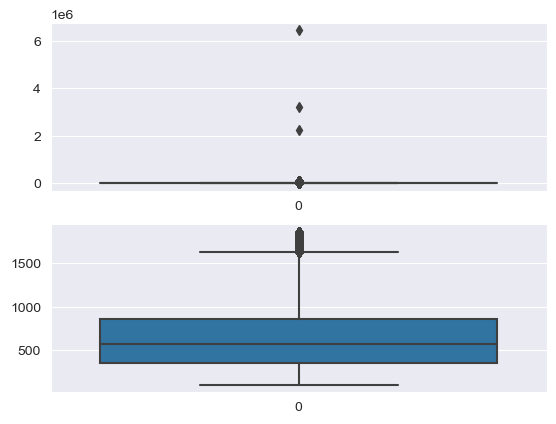

In [52]:
# data_time = clean_data_outlier(data_format_time,'data_delta_T')
pic = plt.figure()

upper_limit = data_format_time['data_delta_T'].quantile(0.99)
lower_limit = data_format_time['data_delta_T'].quantile(0.01)
print("upper limit is:",upper_limit)
print("lower limit is:",lower_limit)
# 初始化箱型图
pic.add_subplot(2,1,1)
sns.boxplot(data_format_time['data_delta_T'].tolist())
# 删除异常值
outlier = data_format_time.loc[(data_format_time['data_delta_T'] > upper_limit) | (data_format_time['data_delta_T'] < lower_limit)]
# trimming -delete the outlier data
data_time = data_format_time.loc[(data_format_time['data_delta_T'] <= upper_limit) & (data_format_time['data_delta_T'] >= lower_limit)]
print("new data is", len(data_time))
print("old data is", len(data_format_time))
print("outlier:", len(outlier))
# 删除异常值之后的箱型图
pic.add_subplot(2,1,2)
sns.boxplot(data_time['data_delta_T'].tolist())

In [53]:
data_time

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance,data_delta_T
14,1,2016-01-01 00:00:04,2016-01-01 00:14:32,1,3.70,-74.004303,40.742241,1,N,-74.007362,...,1,14.0,0.5,0.5,3.05,0.0,0.3,18.35,1.133931,868.0
15,1,2016-01-01 00:00:05,2016-01-01 00:14:27,2,2.20,-73.991997,40.718578,1,N,-74.005135,...,1,11.0,0.5,0.5,1.50,0.0,0.3,13.80,1.600947,862.0
17,2,2016-01-01 00:00:05,2016-01-01 00:07:14,1,1.92,-73.973091,40.795361,1,N,-73.978371,...,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80,0.899645,429.0
19,2,2016-01-01 00:00:06,2016-01-01 00:07:14,1,1.38,-73.994843,40.718498,1,N,-73.989807,...,1,7.0,0.5,0.5,1.66,0.0,0.3,9.96,0.739059,428.0
22,2,2016-01-01 00:00:08,2016-01-01 00:18:51,1,3.09,-73.999069,40.720173,1,N,-73.973389,...,2,14.5,0.5,0.5,0.00,0.0,0.3,15.80,3.065961,1123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968666,2,2016-01-06 23:59:54,2016-01-07 00:15:23,1,4.57,-73.985130,40.744717,1,N,-73.952499,...,1,16.5,0.5,0.5,3.00,0.0,0.3,20.80,3.774883,929.0
1968669,2,2016-01-06 23:59:55,2016-01-07 00:05:12,1,0.50,-73.993584,40.727299,1,N,-73.996552,...,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30,0.330015,317.0
1968670,2,2016-01-06 23:59:55,2016-01-07 00:07:27,1,1.32,-73.959755,40.773647,1,N,-73.959846,...,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.361603,452.0
1968671,2,2016-01-06 23:59:57,2016-01-07 00:02:52,5,1.18,-73.977211,40.784721,1,N,-73.968307,...,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30,1.083728,175.0


### 实现经纬度转地址
### 网约车定位信息

In [54]:
pickup_lon_lat = np.array(pickup_lon_lat)
pickup_lon_lat[:100]

array([[-73.9903717 ,  40.73469543],
       [-73.98078156,  40.7299118 ],
       [-73.96062469,  40.78133011],
       [-73.97942352,  40.74461365],
       [-74.00614929,  40.74491882],
       [-73.96932983,  40.76353836],
       [-74.00430298,  40.74224091],
       [-73.99199677,  40.71857834],
       [-73.98516083,  40.76895142],
       [-73.97309113,  40.79536057],
       [-73.98210144,  40.77469635],
       [-73.99484253,  40.71849823],
       [-73.98916626,  40.7265892 ],
       [-73.99906921,  40.72017288],
       [-73.99713898,  40.74721909],
       [-73.99741364,  40.73667526],
       [-73.99713135,  40.73696136],
       [-73.96391296,  40.71217346],
       [-73.99939728,  40.7439003 ],
       [-73.95440674,  40.77806854],
       [-73.99559784,  40.74423981],
       [-73.99027252,  40.7720108 ],
       [-73.94010925,  40.75115204],
       [-73.98215485,  40.77487946],
       [-74.00806427,  40.74206924],
       [-74.00267792,  40.7306366 ],
       [-73.98165894,  40.77373886],
 

# 1000例数据测试

In [55]:
# x = data_time[:1000]

In [56]:
# # 初始化地图
# m_1 = folium.Map(location=[x['pickup_latitude'].mean(),x['pickup_longitude'].mean()],zoom_start=15)
#
# # 初始化点聚类
# mc = MarkerCluster()
# for idx,row in x.iterrows():
#     mc.add_child(Marker([row['pickup_latitude'],row['pickup_longitude']]))
# m_1.add_child(mc)
# m_1

In [57]:
data_time["day"] = data_time["tpep_pickup_datetime"].dt.day
# data_time = data_time[["tpep_pickup_datetime", "day"]]
data_time.head()

C:\Users\shumo\AppData\Local\Temp\ipykernel_18692\1801131816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_time["day"] = data_time["tpep_pickup_datetime"].dt.day


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance,data_delta_T,day
14,1,2016-01-01 00:00:04,2016-01-01 00:14:32,1,3.70,-74.004303,40.742241,1,N,-74.007362,...,14.0,0.5,0.5,3.05,0.0,0.3,18.35,1.133931,868.0,1
15,1,2016-01-01 00:00:05,2016-01-01 00:14:27,2,2.20,-73.991997,40.718578,1,N,-74.005135,...,11.0,0.5,0.5,1.50,0.0,0.3,13.80,1.600947,862.0,1
17,2,2016-01-01 00:00:05,2016-01-01 00:07:14,1,1.92,-73.973091,40.795361,1,N,-73.978371,...,7.5,0.5,0.5,0.00,0.0,0.3,8.80,0.899645,429.0,1
19,2,2016-01-01 00:00:06,2016-01-01 00:07:14,1,1.38,-73.994843,40.718498,1,N,-73.989807,...,7.0,0.5,0.5,1.66,0.0,0.3,9.96,0.739059,428.0,1
22,2,2016-01-01 00:00:08,2016-01-01 00:18:51,1,3.09,-73.999069,40.720173,1,N,-73.973389,...,14.5,0.5,0.5,0.00,0.0,0.3,15.80,3.065961,1123.0,1


In [58]:
data_time_day1_ID1 = data_time[(data_time['VendorID'] == 1) & (data_time['day'] == 1)]
data_time_day1_ID2 = data_time[(data_time['VendorID'] == 1) & (data_time['day'] == 2)]
data_time_day1_ID3 = data_time[(data_time['VendorID'] == 1) & (data_time['day'] == 3)]
data_time_day1_ID4 = data_time[(data_time['VendorID'] == 1) & (data_time['day'] == 4)]
data_time_day1_ID5 = data_time[(data_time['VendorID'] == 1) & (data_time['day'] == 5)]
data_time_day1_ID6 = data_time[(data_time['VendorID'] == 1) & (data_time['day'] == 6)]

print("平台1day1位置信息:",data_time_day1_ID1.shape)
print("平台1day2位置信息:",data_time_day1_ID2.shape)
print("平台1day3位置信息:",data_time_day1_ID3.shape)
print("平台1day4位置信息:",data_time_day1_ID4.shape)
print("平台1day5位置信息:",data_time_day1_ID5.shape)
print("平台1day6位置信息:",data_time_day1_ID6.shape)

平台1day1位置信息: (52626, 22)
平台1day2位置信息: (51896, 22)
平台1day3位置信息: (48116, 22)
平台1day4位置信息: (50037, 22)
平台1day5位置信息: (53961, 22)
平台1day6位置信息: (55484, 22)


In [59]:
def paint_map(name,data):
    # 初始化地图
    m = folium.Map(location=[data['pickup_latitude'].mean(),data['pickup_longitude'].mean()],zoom_start=15)

    # 初始化点聚类
    mc = MarkerCluster()
    for idx,row in data.iterrows():
        mc.add_child(Marker([row['pickup_latitude'],row['pickup_longitude']]))
    m.add_child(mc)
    m.save(os.path.join('F:\study\Python project\PythonDataAnalysis\Practical training\\Uber\everyday_gps_map_id1\\',name))

In [60]:
# paint_map('day1.html',data_time_day1_ID1)
# paint_map('day2.html',data_time_day1_ID2)
# paint_map('day3.html',data_time_day1_ID3)
# paint_map('day4.html',data_time_day1_ID4)
# paint_map('day5.html',data_time_day1_ID5)
# paint_map('day6.html',data_time_day1_ID6)

# 展示所有网约车的定位信息

# 不要轻易运行

In [61]:
# # 初始化地图
# m_2 = folium.Map(location=[data_time['pickup_latitude'].mean(),data_time['pickup_longitude'].mean()],zoom_start=15)
#
# # 初始化点聚类
# mc = MarkerCluster()
# for idx,row in data_time.iterrows():
#     mc.add_child(Marker([row['pickup_latitude'],row['pickup_longitude']]))
# m_2.add_child(mc)
# m_2.save("F:\study\Python project\PythonDataAnalysis\Practical training\\Uber\\all_data.html")

## 热力图

In [62]:
# 初始化地图
m_3 = folium.Map(location=[data_time['pickup_latitude'].mean(),data_time['pickup_longitude'].mean()],zoom_start=15)

# 增加热力图
HeatMap(data = data_time[['pickup_latitude','pickup_longitude']],radius=15).add_to(m_3)
m_3.save("F:\study\Python project\PythonDataAnalysis\Practical training\\Uber\\all_data_heat_map.html")

In [63]:
def heat_map(data, name):
    # 初始化地图
    m_3 = folium.Map(location=[data['pickup_latitude'].mean(), data['pickup_longitude'].mean()], zoom_start=15)

    # 增加热力图
    HeatMap(data=data[['pickup_latitude', 'pickup_longitude']], radius=15).add_to(m_3)
    m_3.save(os.path.join("F:\study\Python project\PythonDataAnalysis\Practical training\\Uber\\everyday_gps_map_id1\\",
                          name))
heat_map(data_time,'heatmap.html')

In [64]:
data_time.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance,data_delta_T,day
14,1,2016-01-01 00:00:04,2016-01-01 00:14:32,1,3.70,-74.004303,40.742241,1,N,-74.007362,...,14.0,0.5,0.5,3.05,0.0,0.3,18.35,1.133931,868.0,1
15,1,2016-01-01 00:00:05,2016-01-01 00:14:27,2,2.20,-73.991997,40.718578,1,N,-74.005135,...,11.0,0.5,0.5,1.50,0.0,0.3,13.80,1.600947,862.0,1
17,2,2016-01-01 00:00:05,2016-01-01 00:07:14,1,1.92,-73.973091,40.795361,1,N,-73.978371,...,7.5,0.5,0.5,0.00,0.0,0.3,8.80,0.899645,429.0,1
19,2,2016-01-01 00:00:06,2016-01-01 00:07:14,1,1.38,-73.994843,40.718498,1,N,-73.989807,...,7.0,0.5,0.5,1.66,0.0,0.3,9.96,0.739059,428.0,1
22,2,2016-01-01 00:00:08,2016-01-01 00:18:51,1,3.09,-73.999069,40.720173,1,N,-73.973389,...,14.5,0.5,0.5,0.00,0.0,0.3,15.80,3.065961,1123.0,1


## 条形图绘制和处理数据

In [65]:
#根据网约平台和日期求出当天的行驶总距离、车费总收入、接单量。
uber_total= data_time[["VendorID","tpep_pickup_datetime","total_amount","trip_distance"]].copy()
uber_total["trip_distance"]=pd.to_numeric(uber_total["trip_distance"])
uber_total["day"] = uber_total["tpep_pickup_datetime"].dt.day
# 给每一行数据标一个1 最后sum统计订单总量
uber_total["order_count"] = 1
uber_total= uber_total.groupby(["VendorID","day"]).sum().reset_index()
uber_total

,VendorID,day,total_amount,trip_distance,order_count
0,1,1,658295.06,123755.10,52626
1,1,2,632467.80,113299.60,51896
2,1,3,567231.57,104994.10,48116
3,1,4,587761.23,101037.50,50037
4,1,5,659548.65,109604.50,53961
5,1,6,694612.97,115701.60,55484
6,2,1,908568.33,174871.05,73154
7,2,2,798124.67,145981.17,65857
8,2,3,688889.30,130195.58,58253
9,2,4,708977.09,123285.45,59544


In [66]:
# 需要转换成 float类型不然 显示不出来图像
uber_total["order_count"]=uber_total["order_count"].astype('float')

In [67]:
#取出平台1的统计信息
uber_total_VendorID_1=uber_total.loc[uber_total['VendorID']==1]
print(uber_total_VendorID_1)
#取出平台2的统计信息
uber_total_VendorID_2=uber_total.loc[uber_total['VendorID']==2]
uber_total_VendorID_2.index=range(len(uber_total_VendorID_2.reset_index()))
print(uber_total_VendorID_2)

   VendorID  day  total_amount  trip_distance  order_count
0         1    1     658295.06       123755.1      52626.0
1         1    2     632467.80       113299.6      51896.0
2         1    3     567231.57       104994.1      48116.0
3         1    4     587761.23       101037.5      50037.0
4         1    5     659548.65       109604.5      53961.0
5         1    6     694612.97       115701.6      55484.0
   VendorID  day  total_amount  trip_distance  order_count
0         2    1     908568.33      174871.05      73154.0
1         2    2     798124.67      145981.17      65857.0
2         2    3     688889.30      130195.58      58253.0
3         2    4     708977.09      123285.45      59544.0
4         2    5     806852.15      135998.93      65616.0
5         2    6     847553.38      142976.23      67276.0


In [68]:
uber_total_VendorID_1.dtypes

VendorID           int64
day                int64
total_amount     float64
trip_distance    float64
order_count      float64
dtype: object

In [69]:
# df_sub.dtypes

## 条形图绘制

In [70]:
tl = Timeline()
for i in range(1,7):
    df_sub=uber_total[uber_total["day"]==i].sort_values(by=['total_amount','trip_distance','order_count'])
    costs_list=list(df_sub['total_amount'])
    count_list=list(df_sub['order_count'])
    distance_list=list(df_sub['trip_distance'])
    y=[]

    bar = (
        Bar()
        .add_xaxis(['平台1','平台2'])
        .add_yaxis("总收入", list(np.round(costs_list,2)))
        .add_yaxis("总订单", count_list)
        .add_yaxis("总里程数", distance_list)
        .set_global_opts(title_opts=opts.TitleOpts("1、2平台第{}天对比情况".format(i)))
    )
    tl.add(bar, "第{}天".format(i))
# tl.render_notebook()
tl.render("F:\study\Python project\PythonDataAnalysis\Practical training\\Uber\可视化\\total.html")

'F:\\study\\Python project\\PythonDataAnalysis\\Practical training\\Uber\\可视化\\total.html'

## 饼图绘制

In [71]:
from pyecharts.globals import ThemeType
from pyecharts.charts import Pie, Timeline,Grid

t3 = Timeline(init_opts=opts.InitOpts(width="900px", height="600px", theme=ThemeType.CHALK))
attr = ['平台1的总收入','平台2的总收入']
attr1=['平台1的总订单数','平台2的总订单数']
attr2=['平台1的总里程数','平台2的总里程数']
t3 = Timeline()
for i in range(1, 7):
    df_sub_1=uber_total_VendorID_1[uber_total_VendorID_1["day"]==i].sort_values(by=['total_amount','trip_distance','order_count'])
    costs_list_1=list(df_sub_1['total_amount'])
    count_list_1=list(df_sub_1['order_count'])
    distance_list_1=list(df_sub_1['trip_distance'])
    df_sub_2=uber_total_VendorID_2[uber_total_VendorID_2["day"]==i].sort_values(by=['total_amount','trip_distance','order_count'])
    costs_list_2=list(df_sub_2['total_amount'])
    count_list_2=list(df_sub_2['order_count'])
    distance_list_2=list(df_sub_2['trip_distance'])
    y1=[]

    pie = (
        Pie()
        .add(
            "",
            [list(z) for z in zip(attr, [list(np.round(costs_list_1,2)),\
                                         list(np.round(costs_list_2,2))])],
            rosetype="radius",
           radius=["20%", "50%"],
        )
        .set_global_opts(title_opts=opts.TitleOpts("平台1、2第{}天总收入占比".format(i)))
    )
    pie1 = (
        Pie()
        .add(
            "",
            [list(z) for z in zip(attr1, [list(np.round(count_list_1,2)),\
                                         list(np.round(count_list_2,2))])],
            rosetype="radius",
           radius=["20%", "50%"],
        )
        .set_global_opts(title_opts=opts.TitleOpts("平台1、2第{}天总订单数占比".format(i)))
    )

    pie2 = (
        Pie()
        .add(
            "",
            [list(z) for z in zip(attr2, [list(np.round(distance_list_1,2)),\
                                         list(np.round(distance_list_2,2))])],
            rosetype="radius",
           radius=["20%", "50%"],
        )
        .set_global_opts(title_opts=opts.TitleOpts("平台1、2第{}天总里程数占比".format(i)))
        )


    grid = (
    Grid()
        .add(pie, grid_opts=opts.GridOpts(pos_top="10%", pos_right="30%"))
        .add(pie1, grid_opts=opts.GridOpts(pos_top="10%",pos_left="30%"))
        .add(pie2, grid_opts=opts.GridOpts(pos_top="10%",pos_left="30%"))
    )
    t3.add(pie, "第{}天".format(i))
    t3.add(pie1, "第{}天".format(i))
    t3.add(pie2, "第{}天".format(i))
#t3.render_notebook()
t3.render("F:\study\Python project\PythonDataAnalysis\Practical training\\Uber\可视化\pie_chart.html")

'F:\\study\\Python project\\PythonDataAnalysis\\Practical training\\Uber\\可视化\\pie_chart.html'

In [72]:
uber_total_VendorID_1.dtypes

VendorID           int64
day                int64
total_amount     float64
trip_distance    float64
order_count      float64
dtype: object

In [73]:
#饼图时间轮播
from pyecharts import options as opts
from pyecharts.charts import Pie, Timeline,Grid
from pyecharts.globals import ThemeType
#from pyecharts.faker import Faker

attr = ['平台1的总收入','平台2的总收入']
attr1=['平台1的总订单数','平台2的总订单数']
attr2=['平台1的总里程数','平台2的总里程数']
t2 = Timeline(init_opts=opts.InitOpts(width="900px", height="600px", theme=ThemeType.CHALK))
for i in range(1, 7):
    df_sub_1=uber_total_VendorID_1[uber_total_VendorID_1["day"]==i].sort_values(by=['total_amount','trip_distance','order_count'])
    costs_list_1=list(df_sub_1['total_amount'])
    count_list_1=list(df_sub_1['order_count'])
    distance_list_1=list(df_sub_1['trip_distance'])
    df_sub_2=uber_total_VendorID_2[uber_total_VendorID_2["day"]==i].sort_values(by=['total_amount','trip_distance','order_count'])
    costs_list_2=list(df_sub_2['total_amount'])
    count_list_2=list(df_sub_2['order_count'])
    distance_list_2=list(df_sub_2['trip_distance'])
    y1=[]

    pie = (
        Pie(init_opts=opts.InitOpts(theme=ThemeType.CHALK))
        .add(
            "访问来源",
            [list(z) for z in zip(attr, [list(np.round(costs_list_1,2)),\
                                         list(np.round(costs_list_2,2))])],
            rosetype="radius",
            radius=["20%", "50%"],

            label_opts=opts.LabelOpts(
                position="outside",

                formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
                background_color="black",
                border_color="#aaa",
                border_width=1,
                border_radius=4,
                rich={
                    "a": {"color": "skyblue", "lineHeight": 22, "align": "center"},
                    "abg": {
                        "backgroundColor": "black",
                        "width": "100%",
                        "align": "right",
                        "height": 22,
                        "borderRadius": [4, 4, 0, 0],
                    },
                    "hr": {
                        "borderColor": "skyblue",
                        "width": "100%",
                        "borderWidth": 0.5,
                        "height": 0,
                    },
                    "b": {"fontSize": 16, "lineHeight": 33},
                    "per": {
                        "color": "black",
                        "backgroundColor": "skyblue",
                        "padding": [2, 4],
                        "borderRadius": 2,
                    },
                },
            ),
        )
        .set_global_opts(title_opts=opts.TitleOpts("平台1、2第{}天总收入占比".format(i)))
    )
    pie1 = (
        Pie(init_opts=opts.InitOpts(theme=ThemeType.CHALK))
        .add(
            "",
            [list(z) for z in zip(attr1, [list(np.round(count_list_1,2)),\
                                         list(np.round(count_list_2,2))])],
            rosetype="radius",
           radius=["20%", "50%"],
        )
        .set_global_opts(title_opts=opts.TitleOpts("平台1、2第{}天总订单数占比".format(i)))
    )

    pie2 = (
        Pie(init_opts=opts.InitOpts(theme=ThemeType.CHALK))
        .add(
            "",
            [list(z) for z in zip(attr2, [list(np.round(distance_list_1,2)),\
                                         list(np.round(distance_list_2,2))])],
            rosetype="area",
           radius=["20%", "50%"],
        )
        .set_global_opts(title_opts=opts.TitleOpts("平台1、2第{}天总里程数占比".format(i)))
        )


    grid = (
    Grid(init_opts=opts.InitOpts(theme=ThemeType.CHALK))
        .add(pie, grid_opts=opts.GridOpts(pos_top="10%", pos_right="30%"))
        .add(pie1, grid_opts=opts.GridOpts(pos_top="10%",pos_left="30%"))
        .add(pie2, grid_opts=opts.GridOpts(pos_top="10%",pos_left="30%"))
    )
    t2.add(pie, "{}日".format(i))
    t2.add(pie1, "{}日".format(i))
    t2.add(pie2, "{}日".format(i))
    t2.add_schema(is_auto_play=True,play_interval=1500)
#t2.render_notebook()
t2.render('F:\study\Python project\PythonDataAnalysis\Practical training\\Uber\可视化\pie_chart1.html')


'F:\\study\\Python project\\PythonDataAnalysis\\Practical training\\Uber\\可视化\\pie_chart1.html'

In [74]:
# # 平台2
# vendorID2 = uber_total[uber_total['VendorID']==2]
# vendorID2

In [75]:
data_time.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'distance', 'data_delta_T',
       'day'],
      dtype='object')

## 预测用户目的地位置

In [76]:
set(data_time['payment_type'])

{1, 2, 3, 4}

In [77]:
# 取出数据中的目标值和特征值

# 目标值 支付方式
# 特征值 乘客总数 总费用 路程 乘车平台 接单地点经纬度 目的地经纬度
y = data_time[['payment_type']]

x = data_time[['passenger_count','total_amount','trip_distance','VendorID','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]


# x = data_time.drop['VendorID','tpep_dropoff_datetime','trip_distance','RatecodeID','store_and_fwd_flag','fare_amount','extra','mta_tax','tip_amount','tools_amount','improvement_surcharge','total_amount','distance','data_delta_T','dropoff_lon_lat']

In [78]:
# 预测 用户的支付方式

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
std = StandardScaler()

# 对测试集和训练集的特征值进行标准化
x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

# 进行算法流程 # 超参数
knn = KNeighborsClassifier()

# fit， predict,score
knn.fit(x_train, y_train)

# 得出预测结果
y_predict = knn.predict(x_test)

print("使用支付方式：", y_predict)

# 得出准确率
print("预测的准确率:", knn.score(x_test, y_test))

D:\Anaconda\envs\jupy\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


使用支付方式： [1 1 2 ... 2 1 1]
预测的准确率: 0.7258727308996609
